In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib import OCR, OCREngine, PlaneDetector, Postprocessor, Preprocessor

/Users/vojtechjindra/matyas/.venv/lib/python3.11/site-packages/pypdf/_crypt_providers/_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [3]:
plane_detector = PlaneDetector(confidence_threshold=0.5)
ocr = OCR(OCREngine.PADDLEOCR, confidence_threshold=0.5)
postprocessor = Postprocessor(path_to_registrations="registrations/registrations.csv")

steps = [
    (Preprocessor.Color.convert, Preprocessor.Color.BGR, Preprocessor.Color.GRAY),
    (Preprocessor.Contrast.clahe_gray, 3.0, 8),
    (Preprocessor.Enhancement.sharpen,),
    (Preprocessor.Enhancement.denoise_gray,),
    (Preprocessor.Color.convert, Preprocessor.Color.GRAY, Preprocessor.Color.BGR),
]

prep = Preprocessor(steps)

/Users/vojtechjindra/matyas/.venv/lib/python3.11/site-packages/paddle/utils/cpp_extension/extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


## Dataset run


In [4]:
from lib import Dataset, Pipeline

### Single row / video


In [5]:
dataset = Dataset("dataset.csv", drop_duplicates=True)
pipeline = Pipeline(
    plane_detector=plane_detector,
    ocr=ocr,
    preprocessor=prep,
    postprocessor=postprocessor,
    target_fps=5,
)

In [6]:
row_id = (3379, 0)
row = dataset.loc[row_id]

dataset.loc[row_id[0]]

,Video file,Usable,Registration,Segment start,Segment end,Comment
Segment,,,,,,
0,data/IMG_3379.MOV,Yes,OK-FAH,0,2,NaN


In [14]:
ocr_text, ocr_text_postprocessed = pipeline.process_row(row)

dataset.add_results(row_id, ocr_text, ocr_text_postprocessed)

In [15]:
dataset.loc[row_id[0]]

,Video file,Usable,Registration,Segment start,Segment end,Comment,Predicted registration,Predicted registration (postprocessed)
Segment,,,,,,,,
0,data/IMG_3379.MOV,Yes,OK-FAH,0,2,NaN,OK-FAH,OK-FAH


### All rows / videos


In [16]:
from lib import Dataset, Pipeline

In [18]:
dataset = Dataset("dataset.csv", drop_duplicates=True)
# prep = PreprocessorFactory.for_paddle()

pipeline = Pipeline(
    plane_detector=plane_detector,
    ocr=ocr,
    preprocessor=prep,
    postprocessor=postprocessor,
    target_fps=5,
)

In [19]:
pipeline.process_rows(dataset)

100%|██████████| 21/21 [03:43<00:00, 10.66s/it]


,,Video file,Usable,Registration,Segment start,Segment end,Comment,Predicted registration,Predicted registration (postprocessed)
ID,Segment,,,,,,,,
3353,0,data/IMG_3353.MOV,Yes,OK-LTY,1,3,NaN,OK-LTY,OK-LTY
3354,0,data/IMG_3354.MOV,Yes,OK-BIT,14,18,NaN,OK-BIT,OK-BIT
3355,0,data/IMG_3355.MOV,Yes,OK-BIT,0,3,NaN,UK-BIT,OK-BIT
3358,0,data/IMG_3358.MOV,Yes,OK-LTY,1,4,NaN,OK-LTY,OK-LTY
3359,0,data/IMG_3359.MOV,Yes,OK-BIT,19,24,NaN,OX-BIT,OK-BIT
3360,0,data/IMG_3360.MOV,Yes,OK-FAH,11,17,NaN,EOK-FAH,OK-FAH
3363,0,data/IMG_3363.MOV,Yes,OK-LTY,6,13,NaN,OK-LTY,OK-LTY
3367,0,data/IMG_3367.MOV,Yes,OK-BIT,0,4,Úplně perfektní,OK-BIT,OK-BIT
3368,0,data/IMG_3368.MOV,Yes,OK-BIT,2,6,NaN,OK-BIT,OK-BIT


In [21]:
dataset.show_results()

,,Registration,Predicted registration (postprocessed),Predicted registration
ID,Segment,,,
3353,0,OK-LTY,OK-LTY,OK-LTY
3354,0,OK-BIT,OK-BIT,OK-BIT
3355,0,OK-BIT,OK-BIT,UK-BIT
3358,0,OK-LTY,OK-LTY,OK-LTY
3359,0,OK-BIT,OK-BIT,OX-BIT
3360,0,OK-FAH,OK-FAH,EOK-FAH
3363,0,OK-LTY,OK-LTY,OK-LTY
3367,0,OK-BIT,OK-BIT,OK-BIT
3368,0,OK-BIT,OK-BIT,OK-BIT


In [ ]:
dataset.save_to_csv("results/res_paddle_ocr_factory_13_12_2025.csv")

## Camera run


TODO: needs to be adapted to new pipeline design


In [4]:
from lib import CameraSource

In [5]:
camera = CameraSource("data/IMG_3379.MOV")

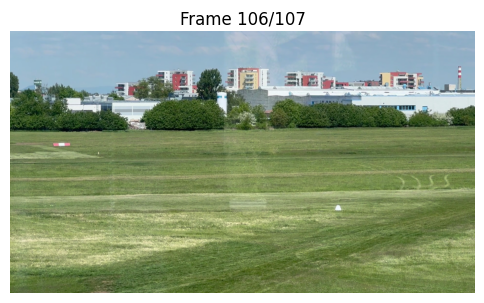

In [20]:
camera.start_stream_notebook(
    plane_detector=plane_detector,
    ocr=ocr,
    target_fps=5,
    start_end_frame=(20, 150),
    # start_end_time=(14, 20),
    preprocessor=prep,
    postprocessor=postprocessor,
)